<h1> Mental Health in Tech Survey_Exploratory Data Analysis</h1>

This dataset is from a 2014 survey that aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

Open Sourcing Mental Illness is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities. OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder. The response was overwhelming, and thus OSMI was born.

- Every year, OSMI came out with a new survey to see how employees want to get mental health treatment in tech companies around the world and I pick the survey from 2014.
- This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.
- This research can help HR to see what factors the company needs to support so the employee wants to get mental health treatment.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [63]:
# Import data
df= pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Understanding the data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [65]:
#Checking missing values
missing_values=100*df.isna().sum()/len(df)
missing_values=missing_values.round(2).sort_values(ascending=False)

print(missing_values.to_frame(name='% of missing values'))

                           % of missing values
comments                                 86.97
state                                    40.91
work_interfere                           20.97
self_employed                             1.43
Gender                                    0.00
Timestamp                                 0.00
Age                                       0.00
family_history                            0.00
treatment                                 0.00
no_employees                              0.00
Country                                   0.00
remote_work                               0.00
tech_company                              0.00
care_options                              0.00
benefits                                  0.00
seek_help                                 0.00
anonymity                                 0.00
leave                                     0.00
wellness_program                          0.00
mental_health_consequence                 0.00
phys_health_c

- There are a 1259 rows and 26 columns in the dataset.
- We see that except the age column, all the columns are of object datatype.
- Comment column seems to contain most number ( 87% ) of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank
- We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
- The state column also contains a lot of null values. We'll dig deeper into that.

In [66]:
#Deleting useless columns
#comments:Lot of missing values, unstructured and heterogeneous data,
#Timestamp: Answering survey in the same period, not useful for temporal analysis

cols_to_drop=['comments','Timestamp']
df.drop(columns=cols_to_drop,inplace=True,errors='ignore')

In [67]:
df['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

60% of the respondant are from the USA and lot of countries only have 1 respondant so it would be misleading to take into account the counrty in our interpretations.
Moreover, the state columns is only for the USA. So we drop country and state.

In [68]:
df.drop(columns=['Country','state'],inplace=True,errors='ignore')

# Data preparation 

Age & Gender

In [69]:
print("The dataset contains different ages: ")
print(df['Age'].unique())
print("\n")
print("The dataset contains different gender notations: \n")
print(df['Gender'].unique())

The dataset contains different ages: 
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


The dataset contains different gender notations: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female

- Regarding the Age, there are incoherent data due to a text free survey that allows these mistakes, so we are gonna take the ages between 18 and 100years.

- Regarding the genders, people have describes themselves in various ways.We will be using this approach for gender column: We will be renaming and combining all the categories into 3 :
    - Male ( regrouping all spelling of male, cis male)
    - Female ( regrouping all spelling of female, cis female)
    - Other ( people who didn't described themseleves as male or female)

In [70]:
# Cleaning the Age column 
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

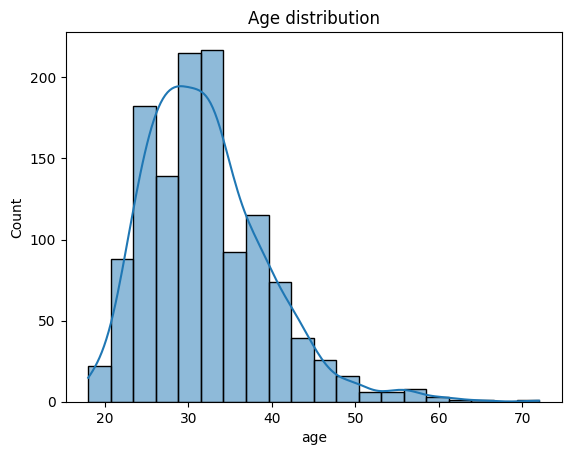

In [71]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title("Age distribution")
plt.xlabel("age")
plt.show()

In [72]:
# Cleaning the Gender column
df['Gender']=df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male')

df['Gender']=df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female')

df['Gender']=df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman','Male-ish',], 'Other')

df['Gender'].value_counts()

Gender
Male      985
Female    247
Other      19
Name: count, dtype: int64

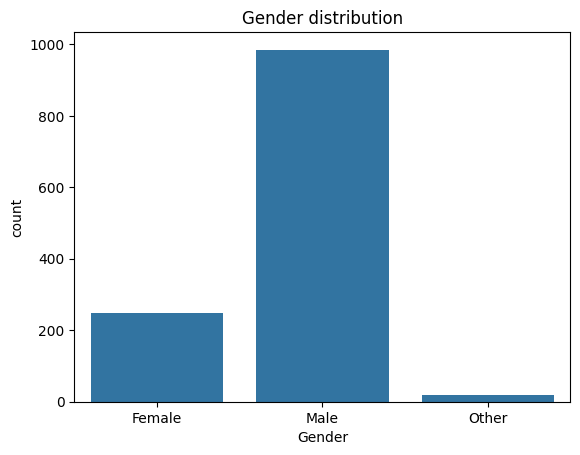

In [73]:
sns.countplot(x='Gender', data=df)
plt.title("Gender distribution")
plt.show()

We note here that the number of male is predominant compared to the 2 other categories.

In [74]:
missing_values=100*df.isna().sum()/len(df)
missing_values=missing_values.round(2).sort_values(ascending=False)

print(missing_values.to_frame(name='% of missing values'))

                           % of missing values
work_interfere                           20.94
self_employed                             1.44
Age                                       0.00
Gender                                    0.00
family_history                            0.00
treatment                                 0.00
no_employees                              0.00
remote_work                               0.00
tech_company                              0.00
benefits                                  0.00
care_options                              0.00
wellness_program                          0.00
seek_help                                 0.00
anonymity                                 0.00
leave                                     0.00
mental_health_consequence                 0.00
phys_health_consequence                   0.00
coworkers                                 0.00
supervisor                                0.00
mental_health_interview                   0.00
phys_health_i

We still have null values in work_interfere and self_employed columns.Since, there are only 20% of work_interfere so let's change NaN to "Don't know. There are only 1.4% of self employed so let's change NaN to NOT self_employed

In [75]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]
['No' 'Yes']


# EDA and Visualizations

C:\Users\okouo\AppData\Local\Temp\ipykernel_22624\1257126948.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




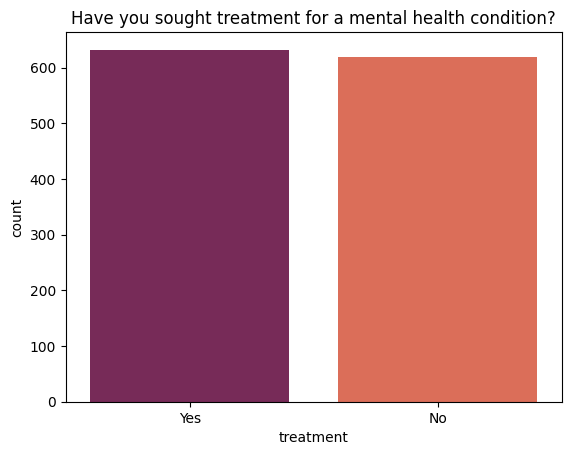

In [76]:
sns.countplot(x='treatment', data=df,palette='rocket')
plt.title("Have you sought treatment for a mental health condition?")
plt.show()

In a context of ML the target data would be if a respondant seek for treatment or not. Let's explore the other columns of this dataset and their relations.

## Family history vs Treatment

C:\Users\okouo\AppData\Local\Temp\ipykernel_22624\70398805.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




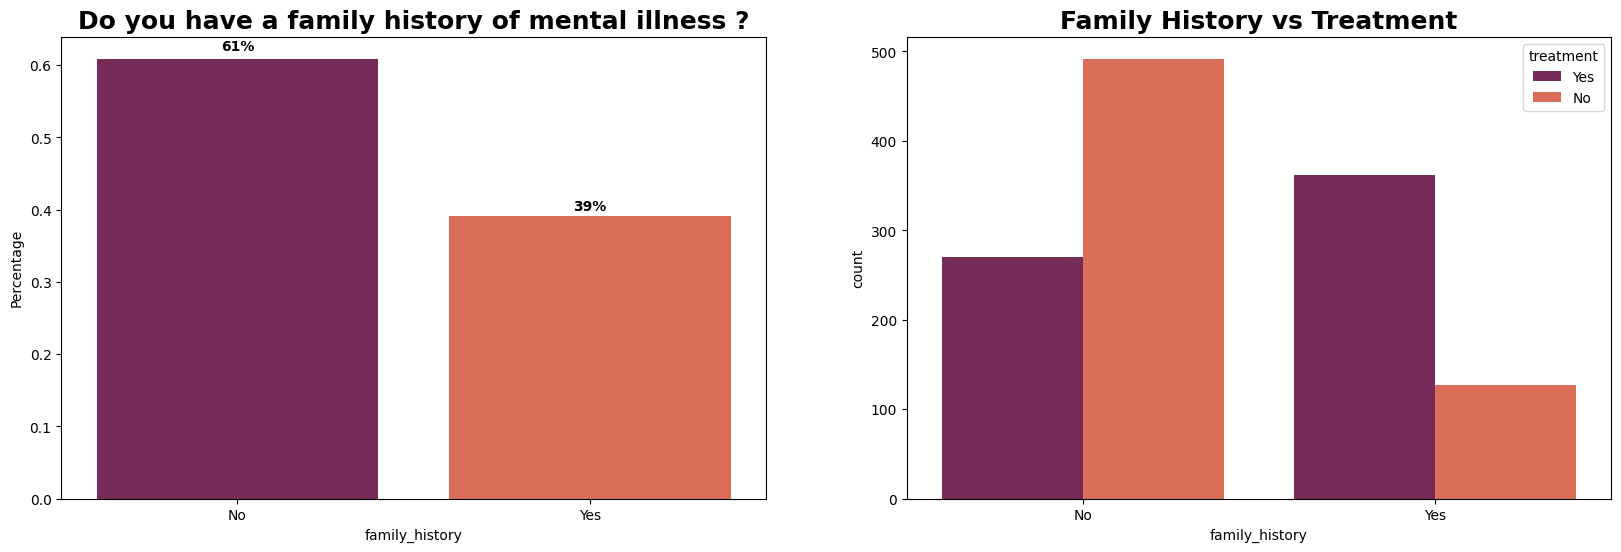

In [77]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Do you have a family history of mental illness ?', fontsize=18, fontweight='bold')


plt.subplot(1,2,2)
sns.countplot(x='family_history', hue = 'treatment',data=df, palette='rocket')
plt.title('Family History vs Treatment', fontsize=18, fontweight='bold')
plt.show()


Respondents with a family history of mental illness are proportionally more likely to seek treatment. This variable therefore appears to be an important explanatory factor to consider when studying the behavior of seeking mental health treatment.

## Work interference vs Treatment

In [78]:
#Count of treatment grouped by work interference
grouped = df.groupby(['work_interfere', 'treatment']).size().reset_index(name='count')
total_per_group = grouped.groupby('work_interfere')['count'].transform('sum')

#Percentage
grouped['percentage'] = (grouped['count'] / total_per_group * 100).round(1)

grouped

,work_interfere,treatment,count,percentage
0,Don't know,No,258,98.5
1,Don't know,Yes,4,1.5
2,Never,No,182,85.8
3,Never,Yes,30,14.2
4,Often,No,21,15.0
5,Often,Yes,119,85.0
6,Rarely,No,51,29.5
7,Rarely,Yes,122,70.5
8,Sometimes,No,107,23.1
9,Sometimes,Yes,357,76.9


C:\Users\okouo\AppData\Local\Temp\ipykernel_22624\1418084975.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




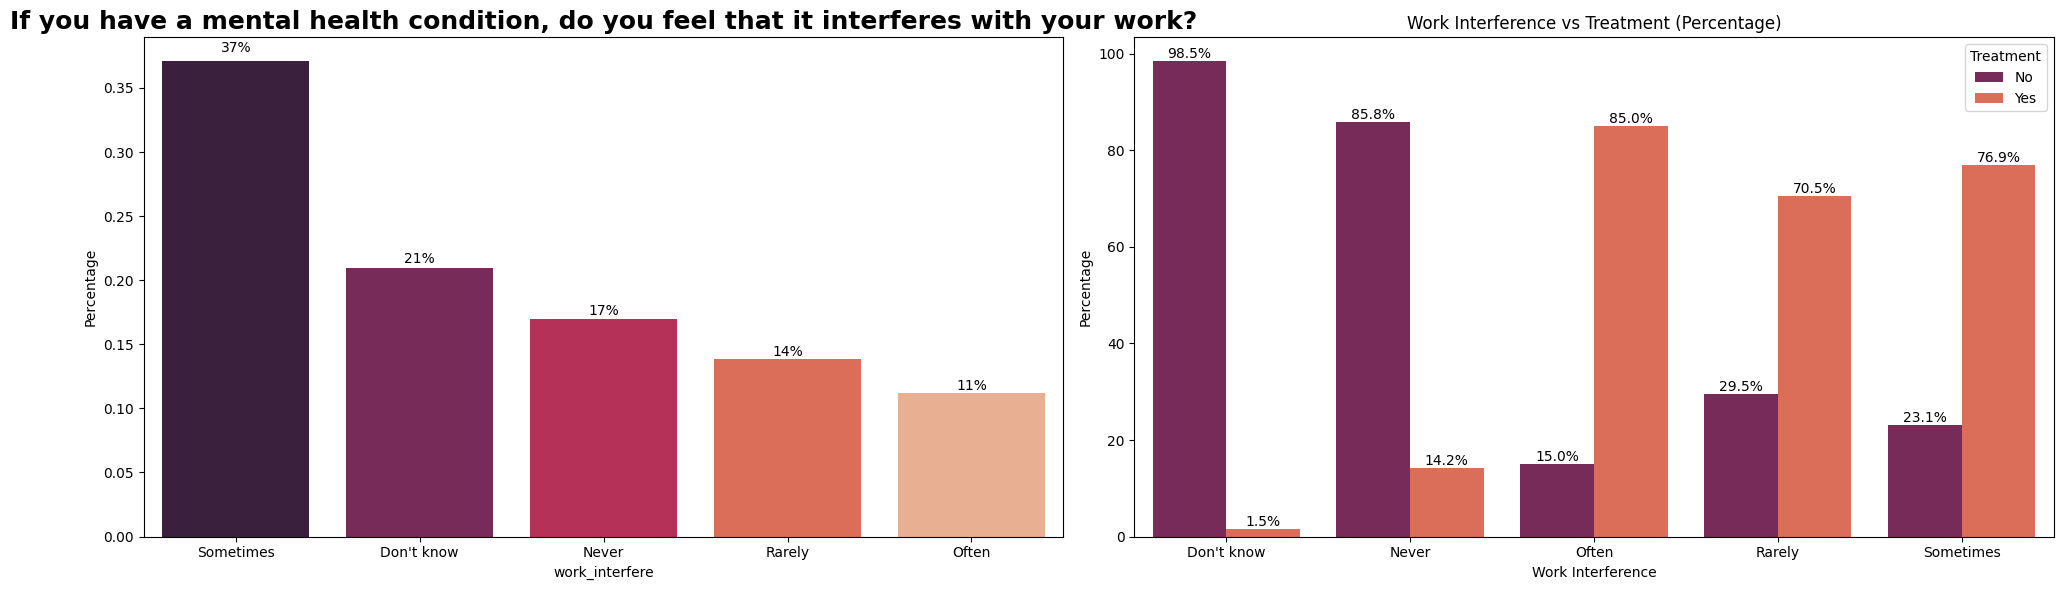

In [79]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.title('If you have a mental health condition, do you feel that it interferes with your work?', fontsize=18, fontweight='bold')


plt.subplot(1,2,2)
sns.barplot(
    data=grouped,
    x='work_interfere',
    y='percentage',
    hue='treatment',
    palette='rocket'
)

plt.title("Work Interference vs Treatment (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Work Interference")
plt.legend(title="Treatment")

#annotations 
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

There is a clear relationship between perceived mental health interference at work and the likelihood of seeking treatment: the more often respondents feel their condition interferes with their work, the more likely they are to pursue professional help.

# Analyze by working environement

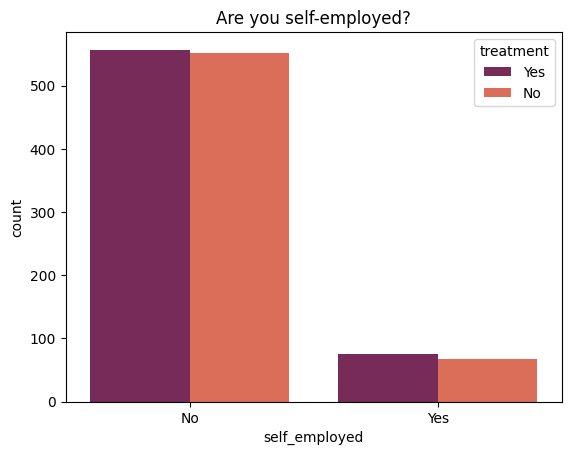

In [80]:
# Self employed
sns.countplot(x='self_employed', hue='treatment', data=df, palette='rocket')
plt.title('Are you self-employed?')
plt.show()

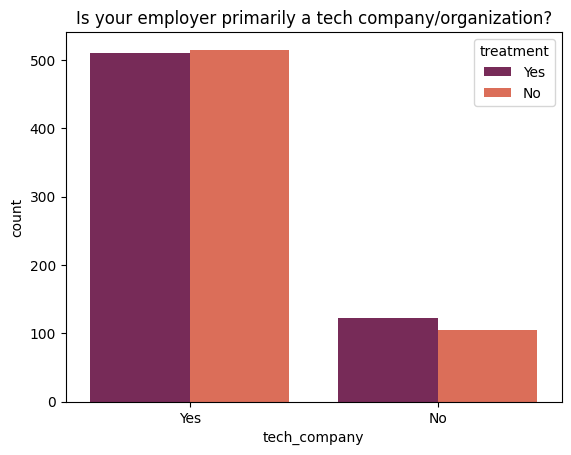

In [81]:
# Tech company
sns.countplot(x='tech_company', hue='treatment', data=df, palette='rocket')
plt.title("Is your employer primarily a tech company/organization?")
plt.show()

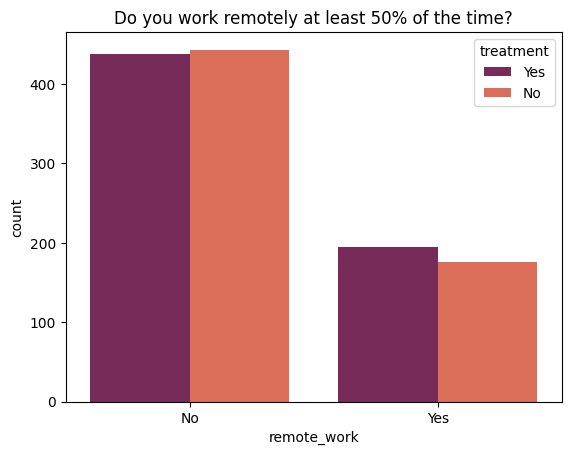

In [82]:
# Remote work
sns.countplot(x='remote_work', hue='treatment', data=df, palette='rocket')
plt.title("Do you work remotely at least 50% of the time?")
plt.show()

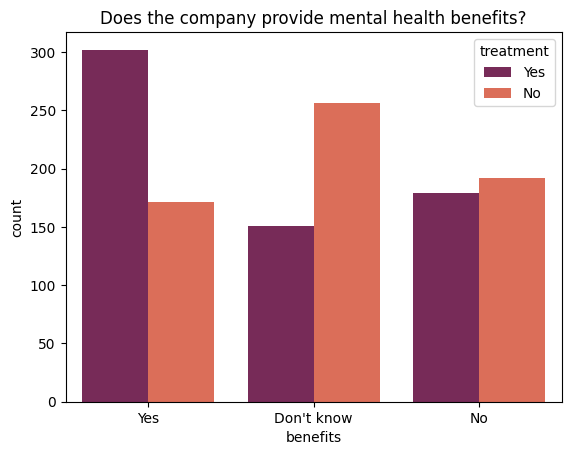

In [83]:
# Benefits
sns.countplot(x='benefits', hue='treatment', data=df, palette='rocket')
plt.title("Does the company provide mental health benefits?")
plt.show()

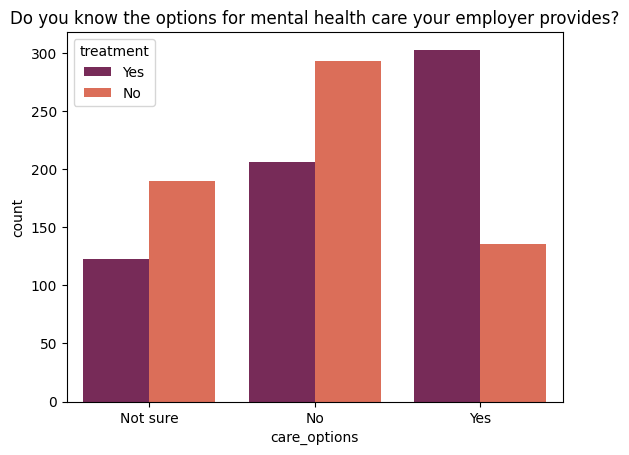

In [84]:
#care options
sns.countplot(x='care_options', hue='treatment', data=df, palette='rocket')
plt.title("Do you know the options for mental health care your employer provides?")
plt.show()

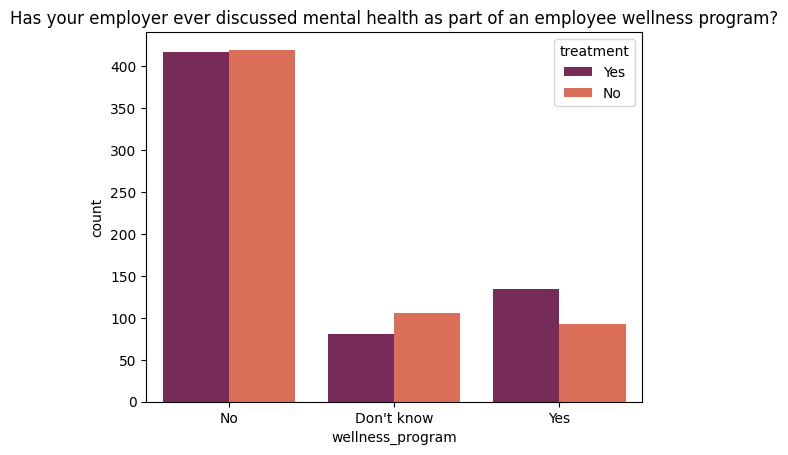

In [85]:
#wellness program
sns.countplot(x='wellness_program', hue='treatment', data=df, palette='rocket')
plt.title("Has your employer ever discussed mental health as part of an employee wellness program?")
plt.show()

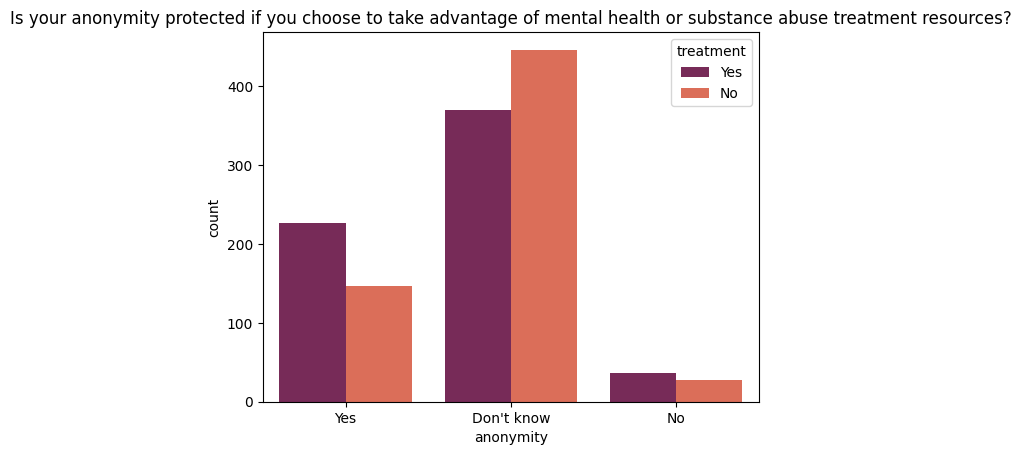

In [86]:
#anonymity
sns.countplot(x='anonymity', hue='treatment', data=df, palette='rocket')
plt.title('Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?')
plt.show()

# Correlations analysis

In [87]:
# Label Encoding the categorical variables
df_corr = df.copy()
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df_corr[col])
    df_corr[col] = label_encoder.transform(df_corr[col])



<Axes: >

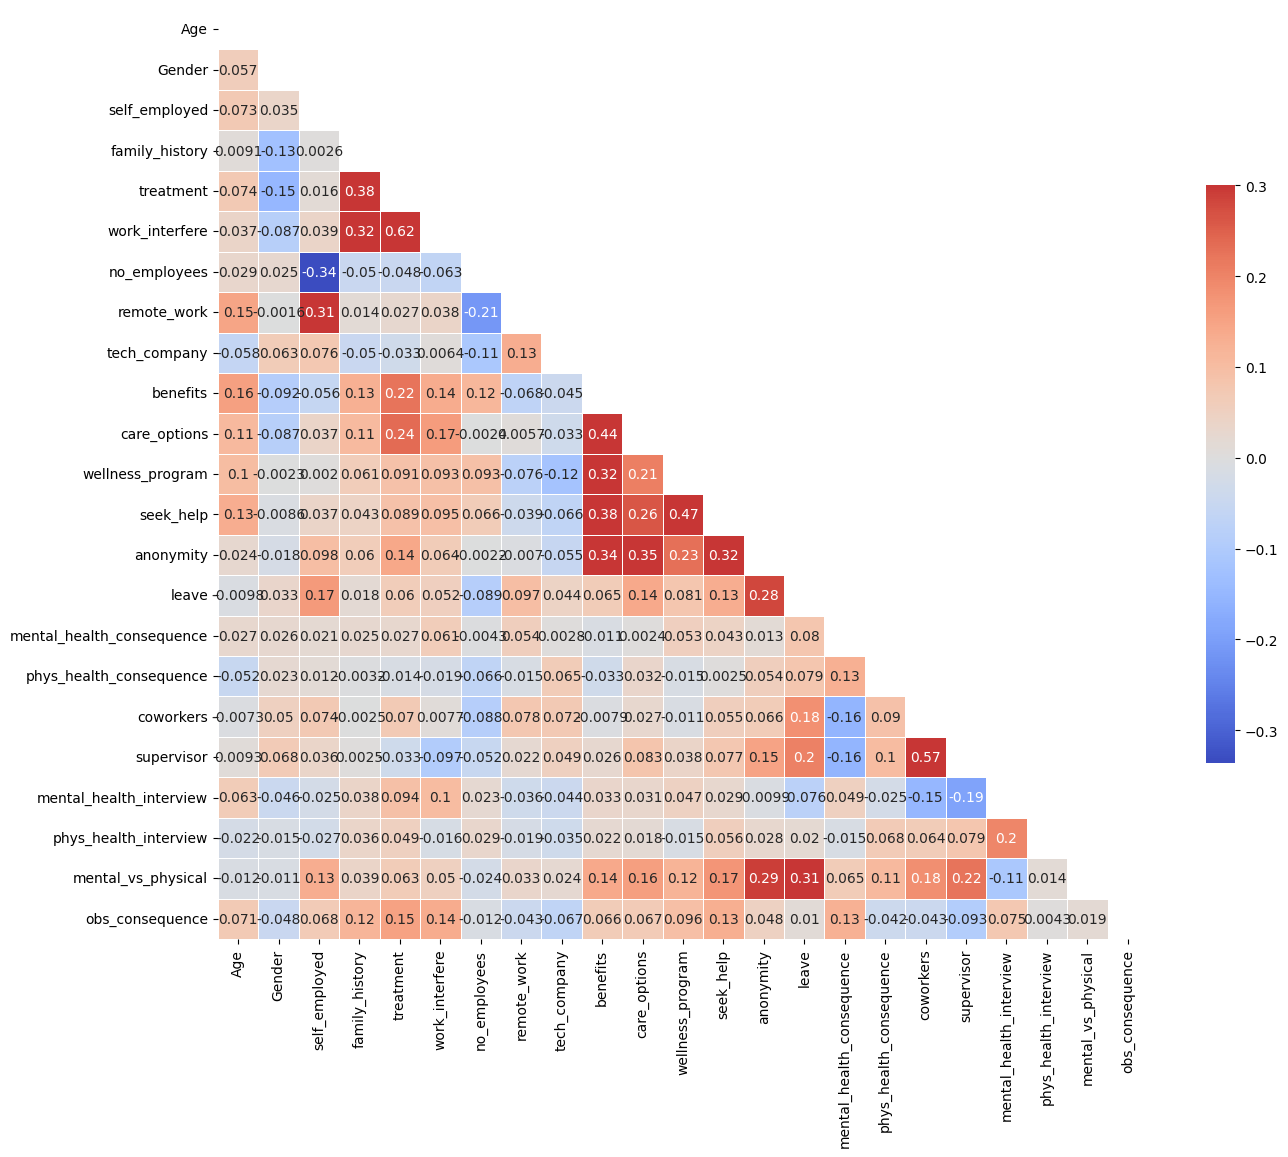

In [95]:
# Compute the correlation matrix
corr = df_corr.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# The correlation matrix highlights that workplace-related factors (such as employer support, anonymity, awareness of care options, and open culture) have a measurable impact on whether respondents seek help or speak about mental health.The perceived interference with work is by far the most predictive variable for treatment seeking.On the other hand, personal attributes like age, gender, or employment type show little to no correlation.